ANN Model


     Actual  Predicted
55        1          2
182       2          1
92        2          2
208       2          2
278       2          2
45        2          2
111       2          2
240       1          1
15        2          2
22        2          2
166       2          2
282       2          2
12        2          2
81        1          2
63        2          2
284       2          2
226       1          2
287       2          2
181       2          1
136       2          2
154       1          2
237       2          2
101       1          1
207       2          2
106       1          2
110       2          2
219       1          2
228       2          2
126       1          1
Mean Absolute Error: 0.27586206896551724
Mean Squared Error: 0.27586206896551724
Root Mean Squared Error: 0.5252257314388902
Accuracy: 0.7241379310344828
Precision: 0.6
Recall: 0.3333333333333333


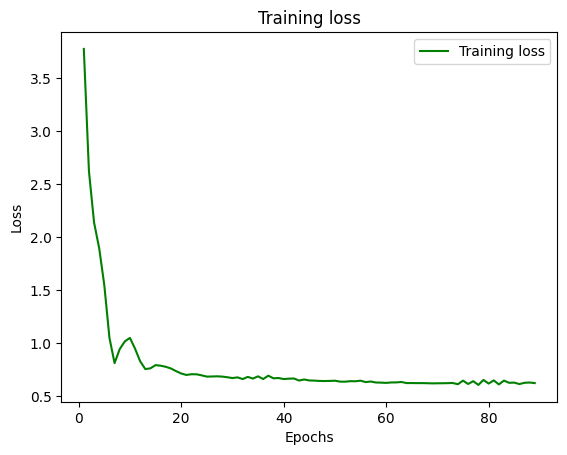

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
dataset = pd.read_excel('subject6.xlsx', engine='openpyxl')
dataset.shape
dataset.describe()
x=dataset.iloc[:,0:35]
y=dataset.iloc[:,36]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
bpn_model = MLPClassifier(random_state=1, max_iter=1000).fit(x_train, y_train)
y_pred = bpn_model.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

print(df)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)
loss= bpn_model.loss_curve_

epochs = range(1,len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

testing / learning rate

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix


dataset = pd.read_excel('subject2.xlsx', engine='openpyxl')


x = dataset.iloc[:, 0:35].to_numpy()
y = dataset.iloc[:, 36].to_numpy()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

learning_rates = ['constant', 'invscaling', 'adaptive']

param_grid = {'learning_rate': learning_rates}
mlp_grid_search = GridSearchCV(MLPClassifier(random_state=1, max_iter=1000), param_grid, cv=5)
mlp_grid_search.fit(x_train, y_train)


best_model = mlp_grid_search.best_estimator_
best_learning_rate = mlp_grid_search.best_params_['learning_rate']

y_pred = best_model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)


Accuracy: 0.7241379310344828
Precision: 0.6
Recall: 0.3333333333333333


array([[ 3,  6],
       [ 2, 18]])

Random Search

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix


dataset = pd.read_excel('subject2.xlsx', engine='openpyxl')


x = dataset.iloc[:, 0:35].to_numpy()
y = dataset.iloc[:, 36].to_numpy()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)


learning_rates = ['constant', 'invscaling', 'adaptive']

param_grid = {'learning_rate': learning_rates}

mlp_grid_search = GridSearchCV(MLPClassifier(random_state=1, max_iter=1000), param_grid, cv=5)
mlp_grid_search.fit(x_train, y_train)


best_grid_model = mlp_grid_search.best_estimator_
best_grid_learning_rate = mlp_grid_search.best_params_['learning_rate']


y_pred_grid = best_grid_model.predict(x_test)
grid_accuracy = metrics.accuracy_score(y_test, y_pred_grid)

print("GridSearchCV Results:")
print("Accuracy:", grid_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_grid))
print("Best Model Architecture:")
print(best_grid_model.get_params()['hidden_layer_sizes'])
print("Best Learning Rate:", best_grid_learning_rate)
print("-" * 50)

param_dist = {'learning_rate': learning_rates}


mlp_random_search = RandomizedSearchCV(MLPClassifier(random_state=1, max_iter=1000),
                                         param_distributions=param_dist,
                                         n_iter=100,
                                         cv=5)
mlp_random_search.fit(x_train, y_train)

best_random_model = mlp_random_search.best_estimator_
best_random_learning_rate = mlp_random_search.best_params_['learning_rate']

y_pred_random = best_random_model.predict(x_test)
random_accuracy = metrics.accuracy_score(y_test, y_pred_random)


print("RandomizedSearchCV Results:")
print("Accuracy:", random_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random))
print("Best Model Architecture:")
print(best_random_model.get_params()['hidden_layer_sizes'])
print("Best Learning Rate:", best_random_learning_rate)


GridSearchCV Results:
Accuracy: 0.7241379310344828
Confusion Matrix:
 [[ 3  6]
 [ 2 18]]
Best Model Architecture:
(100,)
Best Learning Rate: constant
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=100. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV Results:
Accuracy: 0.7241379310344828
Confusion Matrix:
 [[ 3  6]
 [ 2 18]]
Best Model Architecture:
(100,)
Best Learning Rate: constant


batch size


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix

dataset = pd.read_excel('subject2.xlsx', engine='openpyxl')


x = dataset.iloc[:, 0:35].to_numpy()
y = dataset.iloc[:, 36].to_numpy()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)


learning_rates = ['constant', 'invscaling', 'adaptive']



param_grid = {'learning_rate': learning_rates, 'batch_size': [16, 32, 64, 128],
              'max_iter': [100, 200, 500]}


mlp_grid_search = GridSearchCV(MLPClassifier(random_state=1), param_grid, cv=5)
mlp_grid_search.fit(x_train, y_train)


best_grid_model = mlp_grid_search.best_estimator_
best_grid_learning_rate = mlp_grid_search.best_params_['learning_rate']
best_grid_batch_size = mlp_grid_search.best_params_['batch_size']
best_grid_epochs = mlp_grid_search.best_params_['max_iter']


y_pred_grid = best_grid_model.predict(x_test)
grid_accuracy = metrics.accuracy_score(y_test, y_pred_grid)


print("GridSearchCV Results:")
print("Accuracy:", grid_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_grid))
print("Best Model Architecture:")
print(best_grid_model.get_params()['hidden_layer_sizes'])
print("Best Learning Rate:", best_grid_learning_rate)
print("Best Batch Size:", best_grid_batch_size)
print("Best Epochs:", best_grid_epochs)
print("-" * 50)

param_dist = {'learning_rate': learning_rates, 'batch_size': [16, 32, 64, 128],
              'max_iter': [100, 200, 500]}

mlp_random_search = RandomizedSearchCV(MLPClassifier(random_state=1),
                                         param_distributions=param_dist,
                                         n_iter=100,

mlp_random_search.fit(x_train, y_train)


best_random_model = mlp_random_search.best_estimator_
best_random_learning_rate = mlp_random_search.best_params_['learning_rate']
best_random_batch_size = mlp_random_search.best_params_['batch_size']
best_random_epochs = mlp_random_search.best_params_['max_iter']


y_pred_random = best_random_model.predict(x_test)
random_accuracy = metrics.accuracy_score


print("RandomizedSearchCV Results:")
print("Accuracy:", random_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random))
print("Best Model Architecture:")
print(best_random_model.get_params()['hidden_layer_sizes'])
print("Best Learning Rate:", best_random_learning_rate)
print("Best Batch Size:", best_random_batch_size)
print("Best Epochs:", best_random_epochs)


activation function

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix


dataset = pd.read_excel('subject2.xlsx', engine='openpyxl')


x = dataset.iloc[:, 0:35].to_numpy()
y = dataset.iloc[:, 36].to_numpy()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)


activation_functions = ['relu', 'tanh', 'logistic']


learning_rates = ['constant', 'invscaling', 'adaptive']



param_grid = {'activation': activation_functions, 'learning_rate': learning_rates,
              'batch_size': [16, 32, 64, 128], 'max_iter': [100, 200, 500]}


mlp_grid_search = GridSearchCV(MLPClassifier(random_state=1), param_grid, cv=5)
mlp_grid_search.fit(x_train, y_train)


best_grid_model = mlp_grid_search.best_estimator_
best_grid_activation = mlp_grid_search.best_params_['activation']
best_grid_learning_rate = mlp_grid_search.best_params_['learning_rate']
best_grid_batch_size = mlp_grid_search.best_params_['batch_size']
best_grid_epochs = mlp_grid_search.best_params_['max_iter']


y_pred_grid = best_grid_model.predict(x_test)
grid_accuracy = metrics.accuracy_score(y_test, y_pred_grid)


print("GridSearchCV Results:")
print("Accuracy:", grid_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_grid))
print("Best Model Architecture:")
print(best_grid_model.get_params()['hidden_layer_sizes'])
print("Best Activation Function:", best_grid_activation)
print("Best Learning Rate:", best_grid_learning_rate)
print("Best Batch Size:", best_grid_batch_size)
print("Best Epochs:", best_grid_epochs)
print("-" * 50)




dropout


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix


dataset = pd.read_excel('subject2.xlsx', engine='openpyxl')


x = dataset.iloc[:, 0:35].to_numpy()
y = dataset.iloc[:, 36].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
activation_functions = ['relu', 'tanh', 'logistic']
learning_rates = ['constant', 'invscaling', 'adaptive']

param_grid = {'activation': activation_functions, 'learning_rate': learning_rates,
              'batch_size': [16, 32, 64, 128], 'max_iter': [100, 200, 500]}


mlp_grid_search = GridSearchCV(MLPClassifier(random_state=1), param_grid, cv=5)
mlp_grid_search.fit(x_train, y_train)


best_grid_model = mlp_grid_search.best_estimator_
best_grid_activation = mlp_grid_search.best_params_['activation']
best_grid_learning_rate = mlp_grid_search.best_params_['learning_rate']
best_grid_batch_size = mlp_grid_search.best_params_['batch_size']
best_grid_epochs = mlp_grid_search.best_params_['max_iter']

y_pred_grid = best_grid_model.predict(x_test)
grid_accuracy = metrics.accuracy_score(y_test, y_pred_grid)

print("GridSearchCV Results:")
print("Accuracy:", grid_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_grid))
print("Best Model Architecture:")
print(best_grid_model.get_params()['hidden_layer_sizes'])
print("Best Activation Function:", best_grid_activation)
print("Best Learning Rate:", best_grid_learning_rate)
print("Best Batch Size:", best_grid_batch_size)
print("Best Epochs:", best_grid_epochs)
print("-" * 50)